In [1]:
import requests
import cv2
from matplotlib import pyplot as plt 
import numpy as np

from utils import *

## Edge detection using custom kernel

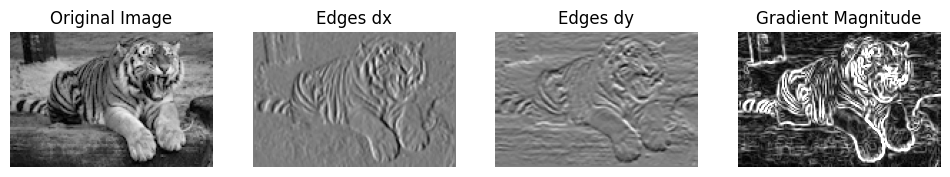

In [24]:
# Read the image
image = cv2.imread('data/images/tiger.jpg', cv2.IMREAD_GRAYSCALE)

# Define a custom kernel for edge detection (Sobel operator)
kernelx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

kernely = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

# Apply the custom kernel using convolution
edgesx = cv2.filter2D(image, cv2.CV_64F, kernelx)
edgesy = cv2.filter2D(image, cv2.CV_64F, kernely)
mag = np.sqrt(edgesx.astype(np.float32)**2 + edgesy.astype(np.float32)**2).astype(np.uint)

# Display the original image and the edges obtained with the custom kernel
plt.figure(figsize=(12, 10))
plt.subplot(141), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(142), plt.imshow(edgesx, cmap='gray')
plt.title('Edges dx'), plt.axis('off')
plt.subplot(143), plt.imshow(edgesy, cmap='gray')
plt.title('Edges dy'), plt.axis('off')
plt.subplot(144), plt.imshow(mag, cmap='gray', vmin=0, vmax=360)
plt.title('Gradient Magnitude'), plt.axis('off')


plt.show()


## Edge detection using Sobel operator

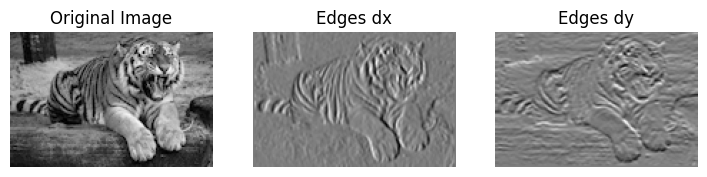

In [20]:
# Read the image
image = cv2.imread('data/images/tiger.jpg', cv2.IMREAD_GRAYSCALE)

# Apply the Sobel edge
sobelx = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
#sobelxy = cv2.Sobel(src=image, ddepth=cv2.CV_8U, dx=1, dy=1, ksize=3)

# Display the original image and the edges side by side
plt.figure(figsize=(12, 10))
plt.subplot(141), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(142), plt.imshow(sobelx, cmap='gray')
plt.title('Edges dx'), plt.axis('off')
plt.subplot(143), plt.imshow(sobely, cmap='gray')
plt.title('Edges dy'), plt.axis('off')
#plt.subplot(144), plt.imshow(sobelxy, cmap='gray')
#plt.title('Sobelxy'), plt.axis('off')


plt.show()


## Edge detection in Noisy images

(Text(0.5, 1.0, 'Edges dy'), (-0.5, 99.5, 99.5, -0.5))

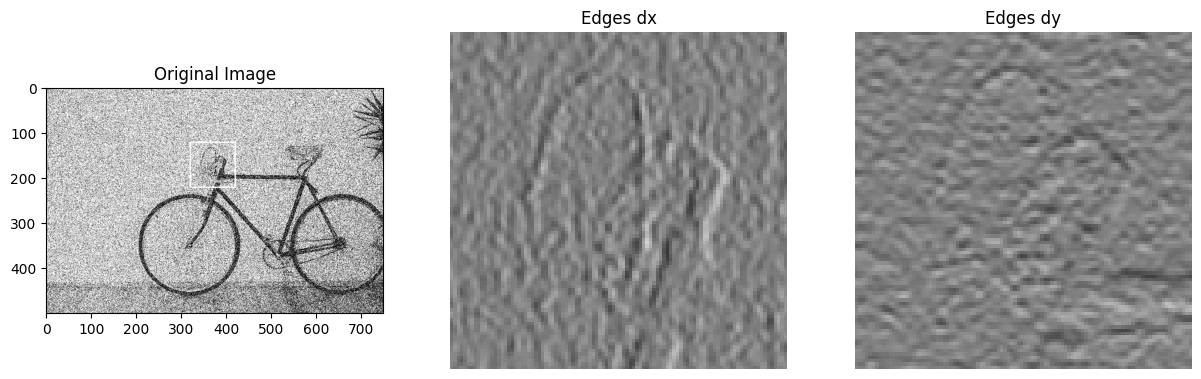

In [57]:
# Read the image
image = getImage('https://images.pexels.com/photos/276517/pexels-photo-276517.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (int(image.shape[1]/3), int(image.shape[0]/3)), interpolation=cv2.INTER_LINEAR) 
noisy_image = gaussian_noise(image, sigma=50)
gaussian_filtered_image = cv2.GaussianBlur(noisy_image, ksize=(3,3), sigmaX = 1, sigmaY = 1)

# Apply the Canny edge detector
#sobelx = cv2.Sobel(src=noisy_image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis
#sobely = cv2.Sobel(src=noisy_image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
sobelx = cv2.Sobel(src=gaussian_filtered_image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=gaussian_filtered_image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis

x1, y1, x2, y2 = 320, 120, 420, 220
# Draw a red rectangular box on the image
cv2.rectangle(noisy_image, (x1, y1), (x2, y2), (255, 0, 0), 2) 

# Display the original image and the edges side by side
plt.figure(figsize=(20, 10))
plt.subplot(141), plt.imshow(noisy_image, cmap='gray')
plt.title('Original Image'), 
plt.subplot(142), plt.imshow(sobelx[y1:y2, x1:x2], cmap='gray', vmin=-1000, vmax=1000)
plt.title('Edges dx'), plt.axis('off')
plt.subplot(143), plt.imshow(sobely[y1:y2, x1:x2], cmap='gray', vmin=-1000, vmax=1000)
plt.title('Edges dy'), plt.axis('off')

In [39]:
np.min(sobelx)

-1003.0

## Canny Edge Detector

(Text(0.5, 1.0, 'Canny Edges'), (-0.5, 2248.5, 1499.5, -0.5))

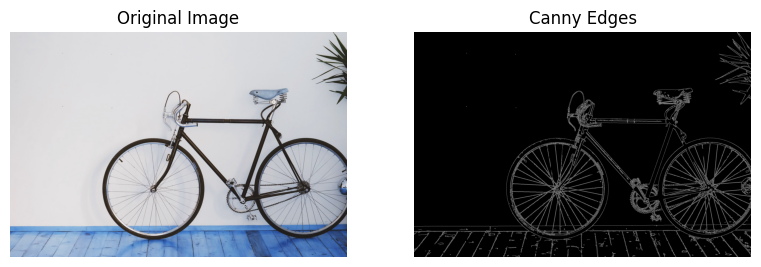

In [23]:
# Read the image
image = getImage('https://images.pexels.com/photos/276517/pexels-photo-276517.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2')

# Apply the Canny edge detector
edges = cv2.Canny(image, 50, 150)

# Display the original image and the edges side by side
plt.figure(figsize=(20, 10))
plt.subplot(141), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(142), plt.imshow(edges, cmap='gray')
plt.title('Canny Edges'), plt.axis('off')
